## Basic Statistics for Finance and Economics

통계모델링 능력을 위한 기초통계

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

start_date = '2020-01-01'
end_date = '2024-05-13'
ticker = '005930'

samsung = pdr.DataReader(
    ticker, # ticker
    'naver', # data source
    start = start_date, # start date
    end = end_date # end date
).astype(float)
samsung.index = pd.to_datetime(samsung.index) # convert to datetime index

### 1. Asset Returns

대부분의 금융 연구는 자산의 가격 대신 수익률을 사용한다. 그 이유는 다음과 같다
1. 일반 투자자들에게 자산의 수익은 투자 기회에 대한 완전하고 규모가 없는 요약이다
2. 전자가 더 매력적인 통계적 특성을 가지고 있기 때문에, 수익률 시계열은 가격 시계열보다 다루기 쉽다

#### One period Simple Return

$t-1$기부터 $t$기까지의 자산을 보유하였을 때의 simple growth return은 다음과 같이 표현할 수 있다

$$ 1 + R_t = \frac{P_t}{P_{t-1}}, \ P_t = P_{t-1}(1 + R_t)$$

simple net return 혹은 simple return은 다음과 같이 표현 가능하다

$$R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$

1기간 수익률은 pandas DataFrame에 내장된 `pct_change()` method로 간단하게 구현을 해낼 수 있다.

In [2]:
ret = samsung['Close'].pct_change()
ret.head() # return series

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
Name: Close, dtype: float64

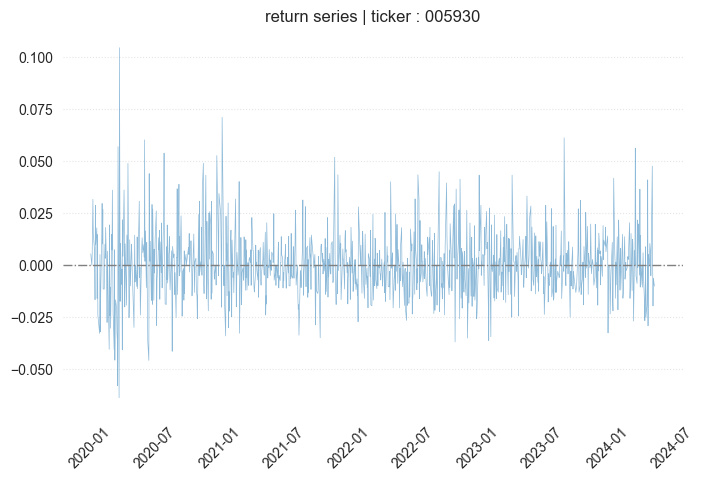

In [3]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    ret,
    alpha = 0.5,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'return series | ticker : {ticker}')
plt.show()

혹은 다음과 같이 `shift` method를 이용해 직접 계산하는 방식으로 구현할 수도 있다.

In [4]:
ret = (samsung['Close'] - samsung['Close'].shift(1)) / samsung['Close'].shift(1)

In [5]:
ret.head()

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
Name: Close, dtype: float64

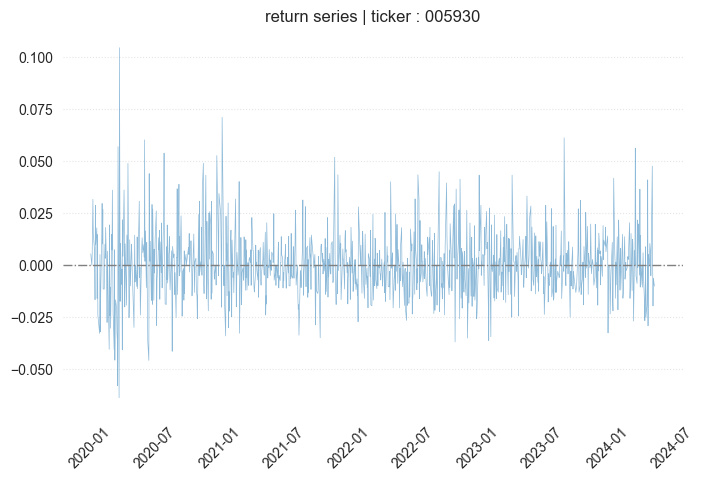

In [6]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    ret,
    alpha = 0.5,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'return series | ticker : {ticker}')
plt.show()

#### Multiperiod Simple Return

자산을 k 기간동안 보유하였을 때의 simple growth return은
$$1 + R_t[k] = \frac{P_t}{P_{t-k}} = (1 + R_t)(1+R_{t-1})\cdots(1+R_{t-k+1})=\prod_{j=0}^{k-1}(1+R_{t-j})$$
이다. pandas에서는 이를 위해 `cumprod()` method를 사용한다

In [7]:
multi_period_returns = (1 + ret).cumprod()

In [8]:
multi_period_returns.head()

Date
2020-01-02         NaN
2020-01-03    1.005435
2020-01-06    1.005435
2020-01-07    1.010870
2020-01-08    1.028986
Name: Close, dtype: float64

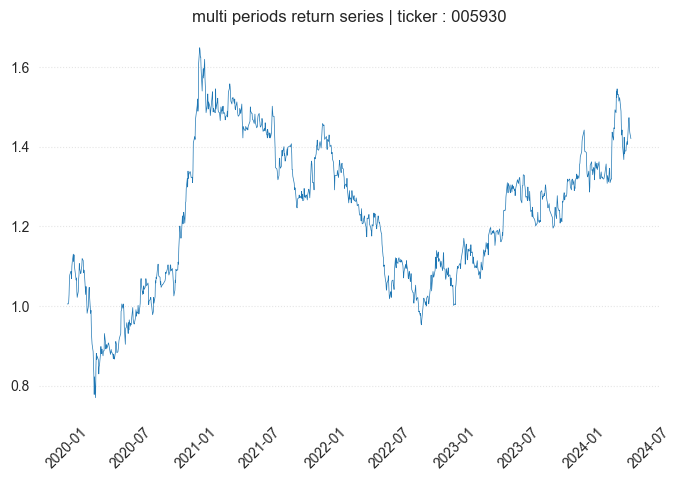

In [9]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    multi_period_returns,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title(f'multi periods return series | ticker : {ticker}')
plt.show()

위 방법이 조금 헷갈린다면 직접 구할수도 있다. 전체 기간의 가격을 첫날 가격으로 나누면 multi period returns를 쉽게 구할 수 있다

In [10]:
multi_period_returns = samsung['Close'] / samsung['Close'].iloc[0]

In [11]:
multi_period_returns.head()

Date
2020-01-02    1.000000
2020-01-03    1.005435
2020-01-06    1.005435
2020-01-07    1.010870
2020-01-08    1.028986
Name: Close, dtype: float64

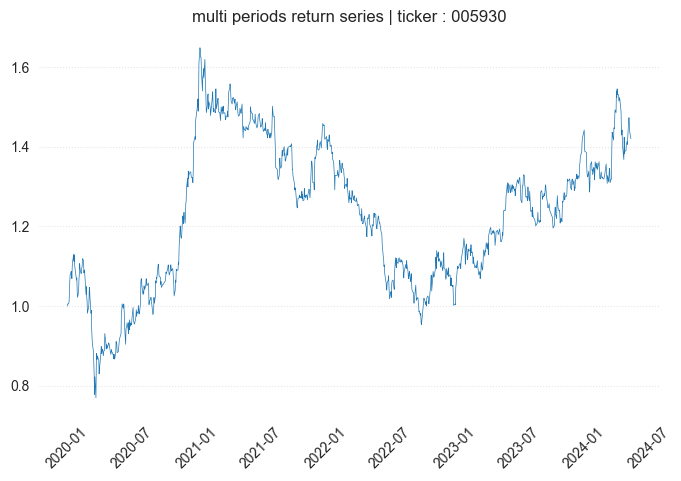

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    multi_period_returns,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title(f'multi periods return series | ticker : {ticker}')
plt.show()

Annualized average return은 다음과 같이 정의한다

$$\text{Annualized}\left\{R_t[k]\right\} = \left[ \prod_{j=0}^{k-1}(1+R_{t-j}) \right]^{\frac{1}{k}} -1$$

계산의 편의를 위해 다음과 같이 쓰기도 한다

$$\text{Annualized}\left\{R_t[k]\right\} = \exp \left[ \frac{1}{k} \sum_{j=0}^{k-1}\ln(1+R_{t-j}) \right] -1$$

In [13]:
annualized_ret = (multi_period_returns.loc[:'2020-03']) ** (12 / 3) - 1

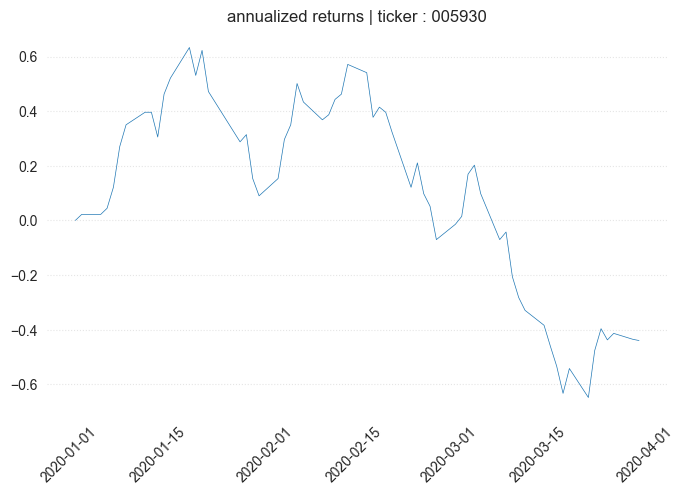

In [14]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    annualized_ret,
    lw = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title(f'annualized returns | ticker : {ticker}')
plt.show()

#### Continuously Compounded Return

log 수익률을 사용하면 다음과 같은 이점이 있다.
1. 계산이 매우 편해진다
2. 비선형성이 감소한다
3. 정규분포를 따르게 된다
4. 수익률이 보수적으로 추정되기 때문에, 성과 지표로 비교하기 유용하다

log return은 다음과 같다

$$r_t = \ln(1 + R_t) = \ln\frac{P_t}{P_{t-1}} = p_t - p_{t-1}$$

여기에서 $p_t = \ln P_t$이다

In [15]:
log_return = np.log(samsung['Close'] / samsung['Close'].shift(1))

In [16]:
log_return.head()

Date
2020-01-02         NaN
2020-01-03    0.005420
2020-01-06    0.000000
2020-01-07    0.005391
2020-01-08    0.017762
Name: Close, dtype: float64

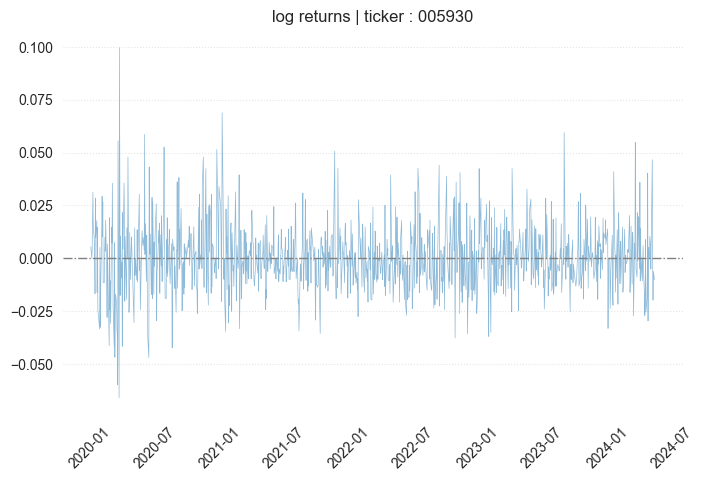

In [17]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(
    log_return,
    lw = 0.5,
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'log returns | ticker : {ticker}')
plt.show()

정규성이 개선되었는지 확인해 보기 위해, histogram을 확인할 수 있다

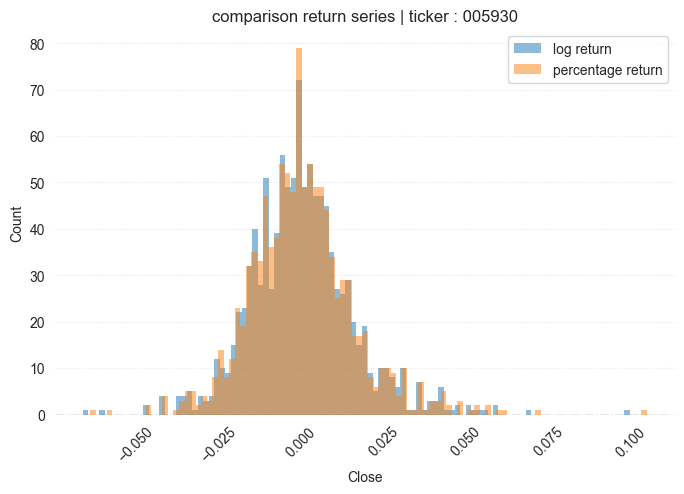

In [18]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.histplot(
    log_return,
    alpha = 0.5,
    ax = ax,
    edgecolor = 'none',
    label = 'log return',
    bins = 100
)
sns.histplot(
    ret,
    alpha = 0.5,
    ax = ax,
    edgecolor = 'none',
    label = 'percentage return',
    bins = 100
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'comparison return series | ticker : {ticker}')
plt.show()

### 2. Distributional Properties of Returns

수익률을 분석하기 위해서는 기본적인 통계적 특성들을 알아야 한다

#### first moments (mean)

$$\hat{μ} = \frac{1}{T}\sum_{t=1}^T x_t$$

정준모수라고도 하며, 데이터를 대표하는 값들 중 가장 많이 사용되는 값이다. 중심극한 정리에 의해, 표본이 충분히 크면 표본평균은 모평균의 값을 대표할 수 있다. 여기서 환기해야 할 점은, 표본평균은 계산식이 쉽기 때문에 자주 잊어먹지만 추정된 모수라는 점을 잊지 말아야 한다. 표본 추출방법에 오류가 있을 경우 얼마든지 편향이 존재할 수 있다. 

대표적으로 데이터가 정규분포가 아니고, 독립적인 표본 추출이 이뤄지지 못했다면 편향된 추정치가 될 수도 있다.

In [19]:
mean = ret.mean()

print(f'mean of return series : {mean : .4f}')

mean of return series :  0.0005


#### median

median (odd n)
$$\text{Median} = x_{\left(\frac{n+1}{2}\right)}$$

median (even n)
$$\text{Median} = \frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}}{2}$$

mean은 outlier에 민감한 경향이 있으며, 표본이 작은 경우에는 종종 좋은 대표값이 되지 못한다. 이러한 데이터에서는 평균을 대표하는 값으로 median이 적절한 대안이 될 수 있다. 다만, 추정치에 서수적 특성이 들어가 있기 때문에 해석에 유의가 필요하다

In [20]:
median = ret.median()

print(f'median of return series : {median : .4f}')

median of return series :  0.0000


#### mode

$$\text{Mode} = \text{value with the highest frequency in the dataset}$$

mode는 데이터 내에서 가장 빈번하게 발생한 값을 의미한다. 중심값을 대변하지는 못하지만 이산적인 데이터 혹은 명목척도로 이뤄진 데이터를 다룰 때 유용할 때가 있다.

In [21]:
mode = np.round(ret, 2).mode()[0]

print(f'mode of return series : {mode : .4f}')

mode of return series :  0.0000


#### second moments (variance)

$$\hat{σ_x^2} = \frac{1}{T-1}\sum_{t=1}^T (x_t - \hat\mu_x)^2$$

분산은 데이터가 평균으로부터 얼마나 벗어났는지 볼 수 있는 통계치이며, 산포모수라고 한다. 표본분산에서는 편향을 줄이기 위해 전체 표본의 수에서 자유도(degree of freedom)만큼 빼준 값을 나눠서 추정한다. 분산은 금융, 경제를 비롯해 사회과학 전반에서 의미있게 사용되는 추정치이다.

In [22]:
variance = ret.var(ddof = 1)

print(f'variance of return series : {variance : .4f}')

variance of return series :  0.0003


표준편차는 분산에 루트를 씌운 값으로, 금융에서는 주로 단순 시장 리스크를 추정할 때 자주 사용된다.

In [23]:
std = ret.std(ddof = 1)

print(f'standard deviation of return series : {std : .4f}')

standard deviation of return series :  0.0160


#### third moments (skewness)

$$\hat{S}(x) = \frac{1}{(T-1)\hat\sigma_x^3}\sum_{t=1}^T(x_t-\hat\mu_x)^3$$
$$t = \frac{\hat S (r)}{\sqrt{6/T}}$$

표본왜도는 분포가 얼마나 치우쳐져 있는지를 나타내는 통계치이다. 오른쪽으로 꼬리가 길면 양의 왜도를 가지고 있다고 하고, 왼쪽으로 꼬리가 길 경우 음의 왜도를 가지고 있다고 한다. 대부분의 금융시장 데이터나 경제 데이터는 하락보다 상승이 더 큰 경우가 많기 떄문에, 양의 왜도를 가지고 있는 것이 일반적이다.

In [24]:
skew = ret.skew()

print(f'skewness of return series : {skew : .4f}')

skewness of return series :  0.6683


양의 왜도를 가지고 있는 경우 최빈값 < 중앙값 < 평균의 순으로 나열된다.

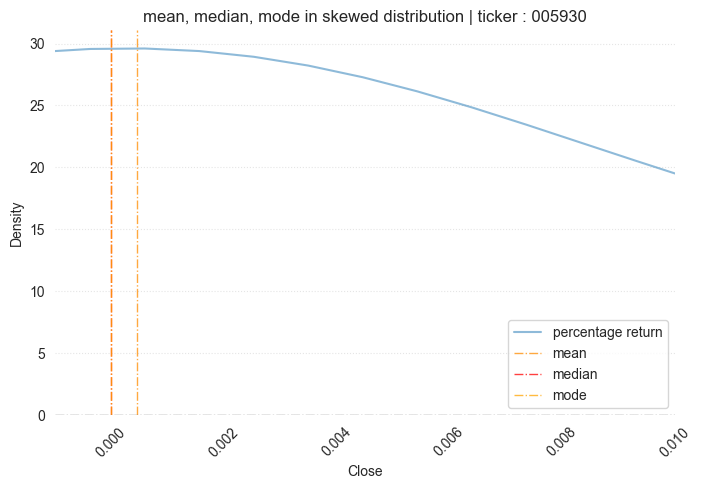

In [25]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    ret,
    alpha = 0.5,
    ax = ax,
    label = 'percentage return',
)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.axvline(x = mean, ls = '-.', lw = 1, color = 'darkorange', alpha = 0.75, label = 'mean')
plt.axvline(x = median, ls = '-.', lw = 1, color = 'red', alpha = 0.75, label = 'median')
plt.axvline(x = mode, ls = '-.', lw = 1, color = 'orange', alpha = 0.75, label = 'mode')
plt.xticks(rotation = 45)
plt.legend()

plt.xlim([-0.001, 0.01])
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'mean, median, mode in skewed distribution | ticker : {ticker}')
plt.show()

#### forth moments (kurtosis)

$$\hat{K}(x) = \frac{1}{(T-1)\hat\sigma_x^4}\sum_{t=1}^T(x_t - \hat\mu_x)^4$$
$$t = \frac{\hat K (r) - 3}{\sqrt{24/T}}$$

첨도는 분포의 꼬리가 양 극단 방향으로 얼마나 치우쳐져 있는지 나타내는 통계치이다. 꼬리가 길고 몸통이 얇고 뾰족할 수록 첨도가 높게 계산된다. pandas에서는 pearson의 kurtosis를 사용하기 때문에 실제 첨도에서 3을 뺀 값으로 계산한다. (정규분포의 첨도 = 3, pearson kurtosis = 0)

In [26]:
kurt = ret.kurt()

print(f'pearson kurtosis of return series : {kurt : .4f}')
print(f'kurtosis of return series : {kurt + 3: .4f}')

pearson kurtosis of return series :  3.0281
kurtosis of return series :  6.0281


### 3. Distribution

지수분포족(exponential family)에는 여러 분포가 존재한다. 통계학에서 자주 사용되는 분포들에 대해 특성을 이해하고, 각 분포의 개형을 살펴보도록 한다.

#### Normal Distribution

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

가장 잘 알려진 연속 확률 분포 중 하나로, 자연 및 사회 과학에서 발생하는 많은 현상을 모델링하는 데 사용된다. 대칭적인 종 모양의 곡선을 가지며, 평균과 표준편차에 의해 모양이 결정된다. 즉, 평균(μ)과 표준 편차(σ)를 매개변수(parameter)로 한다.

금융시장 혹은 경제학에서는 데이터의 로그 형태가 정규분포를 따르는 log normal distribution을 많이 사용한다

In [27]:
mu, sigma = 0, 1
s = np.random.normal(mu, sigma, 10000)

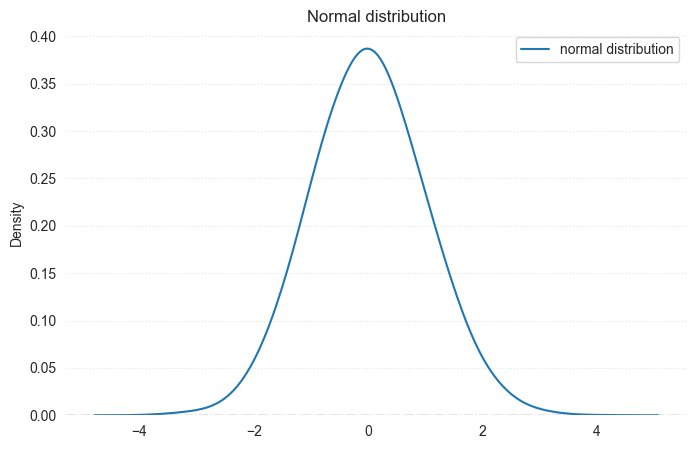

In [28]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    s,
    ax = ax,
    label = 'normal distribution',
    bw_adjust = 2
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'Normal distribution')
plt.show()

#### CHI Square Distribution

$$f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 - 1} e^{-x/2} \quad \text{for} \quad x > 0$$


독립적인 표준 정규분포를 따르는 k개의 랜덤 변수의 제곱합이 이 분포를 따른다. 이 분포는 주로 적합도 검정(goodness of fit test), 독립성 검정, 그리고 두 변수 간의 연관성을 테스트하는 데 사용된다. 분포의 개형은 자유도(k)에 의해 결정된다. 자유도가 증가할수록 분포는 정규 분포에 가까워진다

In [68]:
df_1 = 2 # degree of freedom
df_2 = 10 # degree of freedom
df_3 = 50 # degree of freedom
s_1 = np.random.chisquare(df_1, size = 10000)
s_2 = np.random.chisquare(df_2, size = 10000)
s_3 = np.random.chisquare(df_3, size = 10000)

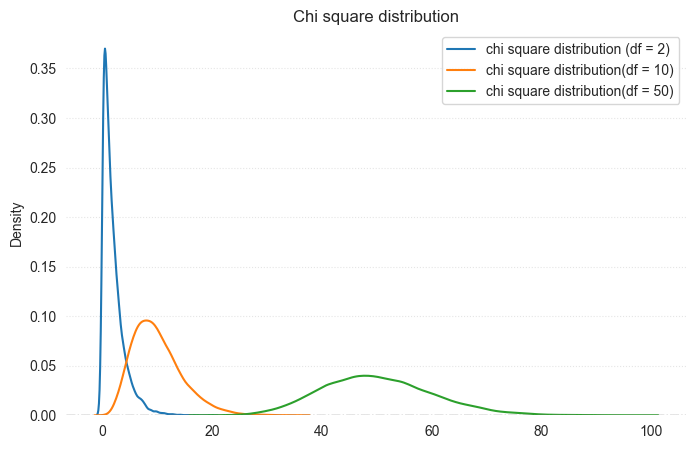

In [69]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    s_1,
    ax = ax,
    label = 'chi square distribution (df = 2)',
    bw_adjust = 1
)
sns.kdeplot(
    s_2,
    ax = ax,
    label = 'chi square distribution(df = 10)',
    bw_adjust = 1
)
sns.kdeplot(
    s_3,
    ax = ax,
    label = 'chi square distribution(df = 50)',
    bw_adjust = 1
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'Chi square distribution')
plt.show()

### Binomial Distribution

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$
$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

고정된 수의 독립 시행에서 각 시행이 성공/실패와 같은 두 가지 결과만이 가능한 실험을 여러 번 반복했을 때, 특정 횟수의 성공이 일어날 확률을 나타내는 분포이다.

In [74]:
n, p = 10, 0.5  # number of trials : 10, prob of success : 50%
s = np.random.binomial(n, p, 10000)

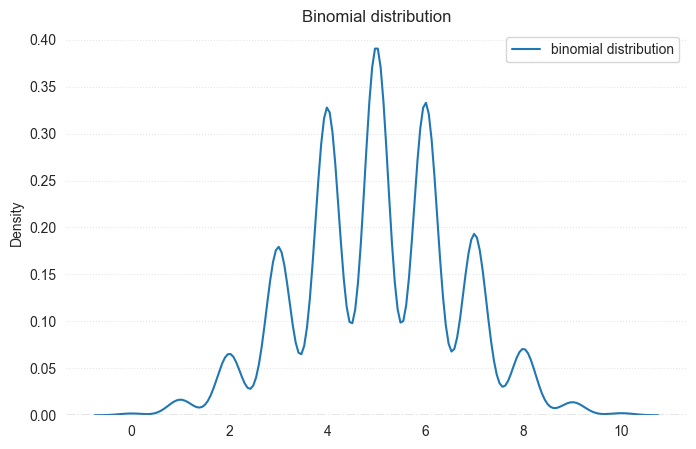

In [75]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    s,
    ax = ax,
    label = 'binomial distribution',
    bw_adjust = 1
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'Binomial distribution')
plt.show()

#### Exponential Distribution

확률밀도함수

$$
f(x; \lambda) = 
\begin{cases} 
\lambda e^{-\lambda x} & \text{for } x \geq 0, \\
0 & \text{for } x < 0
\end{cases}
$$

누적분포함수
$$
F(x; \lambda) = 
\begin{cases} 
1 - e^{-\lambda x} & \text{for } x \geq 0, \\
0 & \text{for } x < 0
\end{cases}
$$

사건 간의 시간을 모델링할 때 사용되는 연속 분포로, memoryless 속성을 가진다. 주로 특정 사건이 발생하는 시간 간격이 일정한 비율로 발생할 때 사용되는데, 대기 시간, 실패 시간 등의 모델링에 사용된다.

In [33]:
lam = 1.0 
s = np.random.exponential(1/lam, 1000)

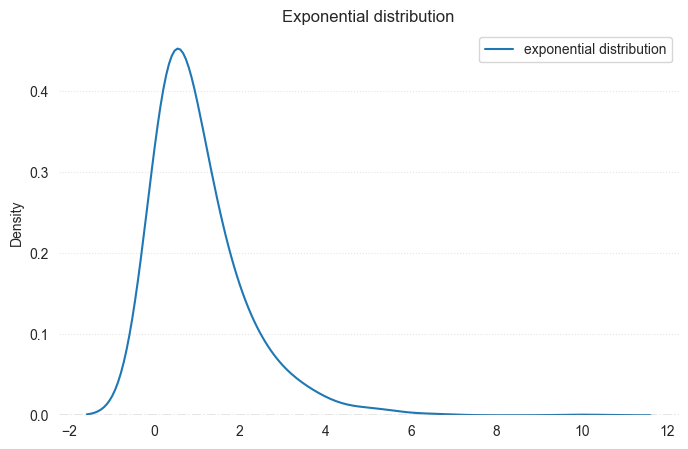

In [34]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    s,
    ax = ax,
    label = 'exponential distribution',
    bw_adjust = 2
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'Exponential distribution')
plt.show()

#### Gamma Distribution

확률밀도함수
$$
f(x; \alpha, \beta) = 
\begin{cases} 
\frac{\beta^\alpha x^{\alpha - 1} e^{-\beta x}}{\Gamma(\alpha)} & \text{for } x \geq 0, \\
0 & \text{for } x < 0
\end{cases}
$$

누적분포함수
$$
F(x; \alpha, \beta) = 
\begin{cases} 
\frac{\gamma(\alpha, \beta x)}{\Gamma(\alpha)} & \text{for } x \geq 0, \\
0 & \text{for } x < 0
\end{cases}
$$

여기서 감마함수는 다음과 같이 정의된다. 감마 함수는 팩토리얼 함수의 일반화된 형태이다.

$$\Gamma(\alpha) = \int_0^\infty t^{\alpha-1} e^{-t} dt$$

지수분포를 일반화한 것으로, 여러 지수분포 사건의 합을 모델링하는 데 사용된다

In [35]:
shape, scale = 2., 2.
s = np.random.gamma(shape, scale, 10000)

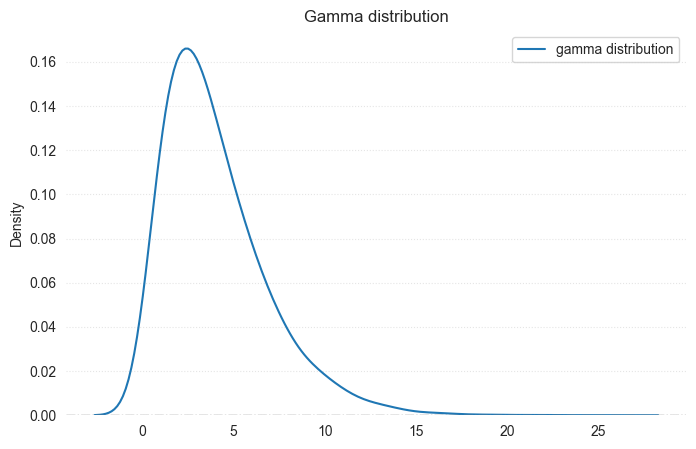

In [36]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    s,
    ax = ax,
    label = 'gamma distribution',
    bw_adjust = 2
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'Gamma distribution')
plt.show()

#### Bernoulli Distribution

$$
P(X = x) = 
\begin{cases} 
p & \text{if } x = 1, \\
1 - p & \text{if } x = 0
\end{cases}
$$

베르누이 분포는 이산 확률 분포의 한 형태로, 단 하나의 시행에서 성공(1) 또는 실패(0)의 두 가지 결과만을 가진다. 예를 들어, 동전 던지기에서 앞면이 나올 확률을 모델링할 때 사용할 수 있다. 베르누이 분포는 단일 시행 사건에 대한 결과를 모델링한 것이다.

베르누이 분포의 파라미터는 p로, 이는 성공 확률을 나타낸다.

In [37]:
from scipy.stats import bernoulli

p = 0.5
s = bernoulli.rvs(p, size = 10000)

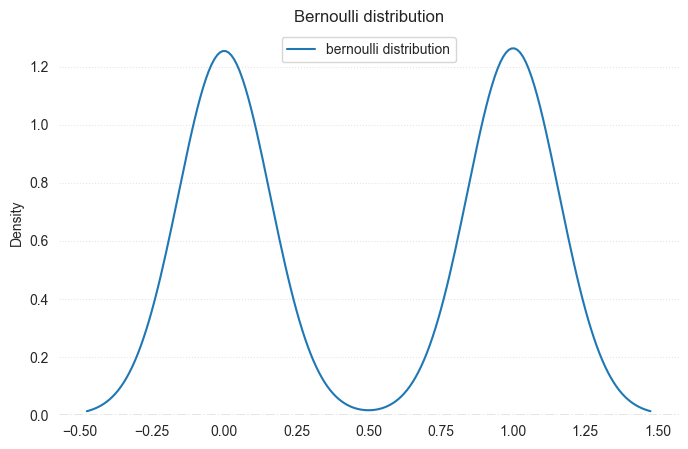

In [38]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    s,
    ax = ax,
    label = 'bernoulli distribution',
    bw_adjust = 2
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'Bernoulli distribution')
plt.show()

#### Poisson Distribution

$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

단위 시간 또는 단위 공간 내에서 발생하는 이벤트의 수를 모델링하는 데 사용되는 분포이다. 사실, 포아송 분포는 이항 분포의 특수한 형태이다. 이항 분포에서 $n$이 매우 크고 $p$가 매우 작은 경우 이항 분포가 포아송 분포로 근사된다. 이를 포아송 극한 정리라고 한다.

In [39]:
lam = 1
s = np.random.poisson(lam, 10000)

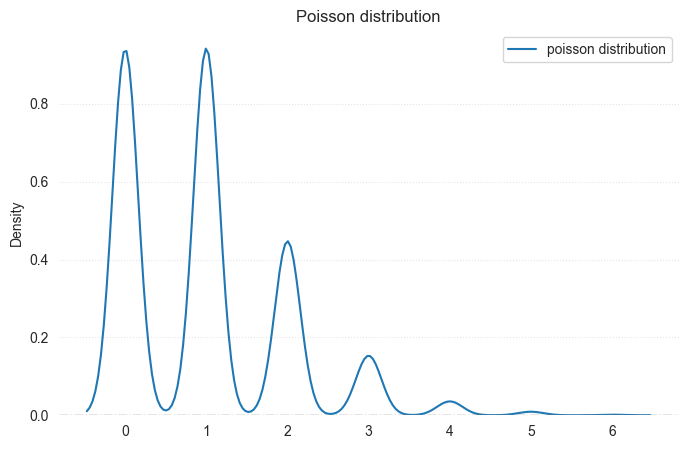

In [40]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    s,
    ax = ax,
    label = 'poisson distribution',
    bw_adjust = 1
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'Poisson distribution')
plt.show()

#### Beta Distribution

$$B(\alpha, \beta) = \int_0^1 t^{\alpha-1} (1-t)^{\beta-1} \, dt = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

0과 1 사이의 값에 대해 정의되는 분포로, 결과가 비율이나 확률로 제한되는 경우에 사용된다. 주로 베이지안 통계학에서 사전 분포로 사용되며, 확률 및 비율과 관련된 문제를 모델링하는 데 유용하다.

In [76]:
a, b = 1.5, 4.5 # shape paramters
s = np.random.beta(a, b, 1000)

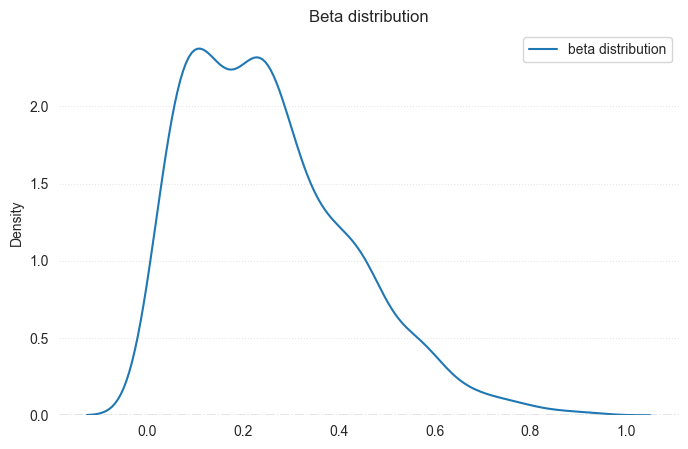

In [77]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(
    s,
    ax = ax,
    label = 'beta distribution',
    bw_adjust = 1
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'Beta distribution')
plt.show()

**왜 지수분포족인가?**

Machine Learning, Deep Learning 혹은 Generalized Linear Model을 추정하기 위해서는 데이터는 지수분포족 분포의 계열을 따라야 한다. 분포의 종류를 알아 두면, 차후 모델링에서 굉장히 도움이 많이 된다.

### 4. Statistics Test

통계적 검증에는 여러가지가 존재한다.

#### Shapiro Wilk Test

Shapiro-Wilk test의 검정 통계량은 다음과 같이 계산된다.

$$W = \frac{\left( \sum_{i=1}^n a_i x_{(i)} \right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

이 검정 통계량의 값이 1에 가까울수록 정규분포에 가깝다는 것을 의미한다. 데이터가 50개 이하인 소규모 데이터에 적합하며, 귀무가설은 '데이터는 정규분포를 따른다' 이다.

즉, 귀무가설을 기각하면 데이터는 정규성을 띄지 않는다는 것이다.

In [43]:
import scipy.stats as stats

stat, p_value = stats.shapiro(ret.dropna())
print('Statistics = %.3f, p-value = %.3f' % (stat, p_value))

if p_value > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics = 0.965, p-value = 0.000
Sample does not look Gaussian (reject H0)


#### Jarque Berra Nomality Test

데이터의 왜도와 첨도를 사용해 정규분포를 따르는지 검정한다. 귀무가설은 '정규분포를 따른다' 이며, p-value가 극단적으로 작아질수록 정규분포가 아닐 가능성이 크다는 결론을 내릴 수 있다. 

$$\mathbf{JB} = \frac{\hat S^2 (r)}{\sqrt{6/T}} + \frac{(\hat K (r) - 3)^2}{\sqrt{24/T}}$$

JB값이 0에 가까울수록 정규성을 띈다고 본다.

In [44]:
from scipy.stats import jarque_bera

jb_stat, p_value = jarque_bera(ret.dropna())

수익률 데이터에 확인해 본 결과, 정규분포를 따르지 않는다는 결론을 내린다

In [45]:
print(f"Jarque-Bera statistic : {jb_stat : .4f}")
print(f"P-value : {p_value : .4f}")

Jarque-Bera statistic :  485.2124
P-value :  0.0000


#### Z-score Test

고등학교 통계 시간에서 보던 수식으로, 데이터의 표준화에 사용된다. Z score test는 데이터가 정규성을 띄는지 검정을 하기보다는, 주로 이상치를 탐지하는데 사용된다. 

$$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

Extreme threshold인 (주로)$3\sigma$를 넘어가는 경우 이상치로 판단한다

In [46]:
z_scores = np.abs((ret - np.mean(ret)) / np.std(ret))
outliers = ret[z_scores > 3]

In [47]:
print(outliers)

Date
2020-03-19   -0.058114
2020-03-20    0.057043
2020-03-23   -0.063877
2020-03-24    0.104706
2020-04-17    0.048980
2020-06-03    0.060311
2020-07-28    0.053957
2020-11-16    0.049051
2020-12-24    0.052774
2021-01-08    0.071170
2021-11-22    0.051966
2023-09-01    0.061286
2024-03-20    0.056319
Name: Close, dtype: float64


#### Stationarity Test (Unit root test)

시계열 데이터가 단위근(unit root)을 가지고 있는지 여부를 확인하는 통계적 검정으로 Augmented Dickey-Fuller의 검정을 사용한다. 

단위근이 존재하면 시계열 데이터는 비정상적이고, 단위근이 없으면 정상성이 있는 시계열 데이터로 판단한다. ADF 검정은 시계열 데이터의 자기상관성을 고려하여 단위근 존재 여부를 검정한다.

$$\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \sum_{i=1}^p \delta_i \Delta y_{t-i} + \epsilon_t$$
$$\text{ADF} = \frac{\hat{\gamma}}{\text{SE}(\hat{\gamma})}$$

이 검정의 귀무가설과 대립가설은 다음과 같다.

- 귀무가설 : 시계열 데이터가 단위근을 가진다(비정상 시계열)
- 대립가설 : 시계열 데이터가 단위근을 가지지 않는다(정상 시계열)

데이터 내에 단위근이 존재하면 결과 해석이 시간 의존적이라는 뜻이므로, 단위근이 존재하는 상태에서 해석을 하면 잘못된 결론이 도출될 수 있다. 상관계수를 아직 배우지는 않았지만, 계수(coefficient)가 붙은 만큼, **어떤 변수에 대해 과거 값에 영향을 받는 정도**로 일단 알아두기만 하자.


In [48]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(samsung['Close'])
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values :')
for key, value in result[4].items():
    print('\t%s : %.3f' % (key, value))

if result[1] > 0.05:
    print('Time series is not stationary')
else:
    print('Time series is stationary')

ADF Statistic : -1.785179
p-value : 0.387844
Critical Values :
	1% : -3.436
	5% : -2.864
	10% : -2.568
Time series is not stationary


In [49]:
result = adfuller(ret.dropna())
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values :')
for key, value in result[4].items():
    print('\t%s : %.3f' % (key, value))

if result[1] > 0.05:
    print('Time series is not stationary')
else:
    print('Time series is stationary')

ADF Statistic : -32.957735
p-value : 0.000000
Critical Values :
	1% : -3.436
	5% : -2.864
	10% : -2.568
Time series is stationary


### 5. Hypothesis Test

#### Null Hypothesis & Alternative Hypothesis

Null Hypothesis는 보통 사회적인 통념, 반박하고 싶은 주장이나 가설을 대입하고, Alternative Hypothesis는 연구자가 주장하고 싶은 주장이나 가설을 의미한다. 

$$\text{Null Hypothesis} :  H_0$$
$$\text{Alternative Hypothesis} : H_1$$

예를 들어서, NBER에서 지정한 Recession 기간 동안의 CPI증가율이 Recession이 아닐 때의 CPI증가율과 다르다는 주장을 검정하기 위해 다음과 같은 과정을 따를 수 있다. NBER은 전미경제연구소(National Bureau of Economic Research)의 약자로, 사후적으로 recession 기간이었는지 판단하여 매달 indicator를 발표한다. 1970년부터 2024년 3월까지의 데이터를 받아와, 실제로 유의미한 차이가 있는지 살펴본다

In [50]:
import pandas_datareader as pdr

cpi = pdr.get_data_fred('CPIAUCSL', start = '1970-01-01', end = '2024-03-31')
nber = pdr.get_data_fred('USREC', start = '1970-01-01', end = '2024-03-31')

전체 기간의 CPI 증가률을 살펴보자

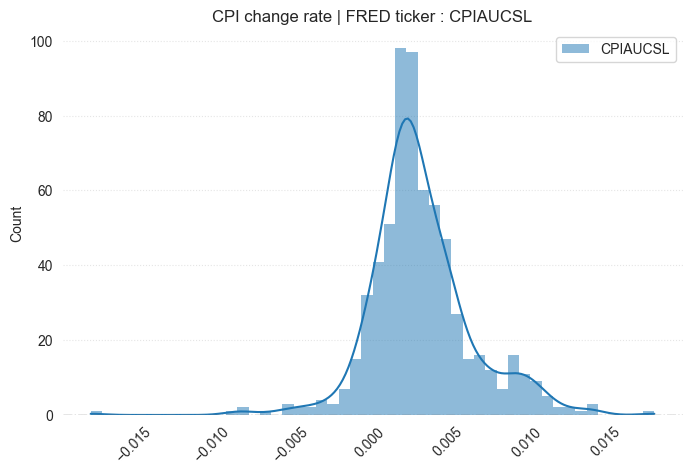

In [51]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.histplot(cpi.pct_change().dropna(), bins = 50, edgecolor = 'none', ax = ax, kde = True)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 45)

plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'CPI change rate | FRED ticker : CPIAUCSL')
plt.show()


NBER의 recession indicator는 다음과 같이 1과 0으로 이뤄진 이진 데이터이다(1이면 recession, 0이면 none recession)

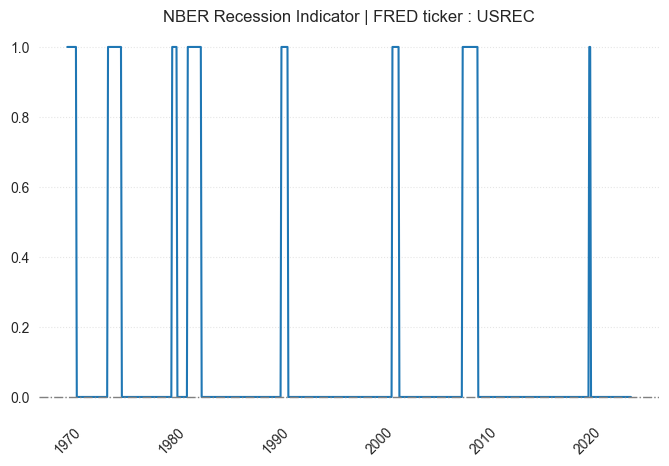

In [52]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(nber)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 45)

plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'NBER Recession Indicator | FRED ticker : USREC')
plt.show()


CPI를 국면별로 나누기 위해 다음과 같은 과정을 시행해 object에 저장한다.

In [53]:
cpi_rec = cpi.pct_change().loc[nber[nber == 1].dropna().index].dropna() # recession
cpi_exp = cpi.pct_change().loc[nber[nber == 0].dropna().index].dropna() # non recession

다음과 같이 분포가 두 형태로 나뉘는 것을 확인할 수 있다.

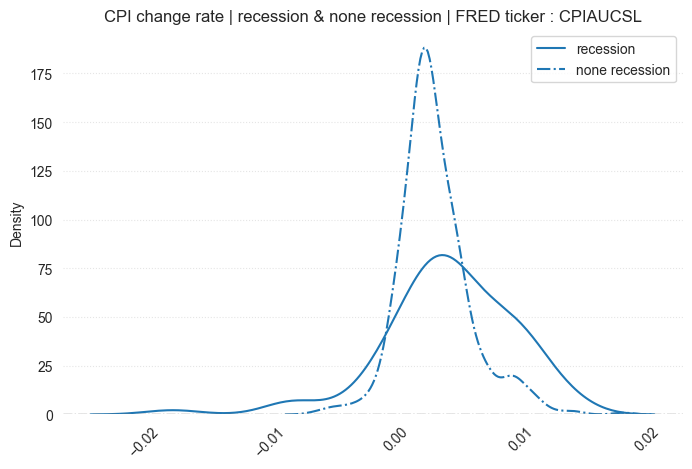

In [54]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.kdeplot(cpi_rec, ax = ax, label = 'recession')
sns.kdeplot(cpi_exp, ax = ax, label = 'none recession', ls = '-.')
plt.legend()

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 45)

plt.axhline(y = 0, color = 'gray', ls = '-.', lw = 1)
plt.title(f'CPI change rate | recession & none recession | FRED ticker : CPIAUCSL')
plt.show()


recession기간일 때의 CPI change rate와 아닌 경우의 CPI change rate는 평균이 통계적으로 유의할 정도로 다른지 검정한다.

In [55]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(cpi_rec, cpi_exp)

p value는 귀무가설이 참일 경우, 관찰된 통계치 또는 더 극단적인 값을 얻을 확률이다. 이 값이 매우 작으면, 우리는 관찰된 결과가 우연히 발생하기에는 너무 희귀하다고 판단하게 된다. 그 결과, 귀무가설을 기각하는 근거가 될 수 있다. 보편적으로 1%, 5%, 10%의 유의수준을 사용할 때, p-value의 임계치는 0.01, 0.05, 0.10이다. 이 값보다 작으면 '대립가설이 우연이라고 하기에는 너무 희귀한 사건이다' 라고 판단하여, 귀무가설을 기각할 근거로 사용된다.

다만, p value는 선형적으로 추정될 뿐만 아니라, 데이터의 모든 것을 말해주지 않으므로 해석에 유의가 필요하다. 2019년 전미통계협회는 p value를 통계적 척도로 사용하지 말 것을 권장하기도 했다. 그럼에도 불구하고, p value는 아직까지도 변수 선택과 모형의 설명력을 뒷받침하는 증거로 많이 사용된다.

In [56]:
print(f"t-statistic : {t_stat[0] : .4f}", )
print(f"p-value : {p_value[0] : .4f}")

t-statistic :  2.9384
p-value :  0.0034


#### Type I & Type II error

![error](./image/type1_type2_error.png)

통계학과 사회과학에서 type1, type2 error는 해묵은 논쟁이지만 많은 이들이 생각하지 않는 부분이기도 하다. type1 error와 type2 error는 다음과 같이 정의내릴 수 있다.

- Type I error($\alpha$) : 귀무가설이 참일 때 이를 기각하는 오류. 즉, 실제로 효과가 없는데 효과가 있다고 잘못 결론 내리는 경우
- Type II error($\beta$) : 귀무가설이 거짓일 때 이를 기각하지 못하는 오류. 즉, 실제로 효과가 있는데 효과가 없다고 잘못 결론 내리는 경우

대부분의 경우 대립가설에 대한 정보와 데이터가 존재하지 않기 때문에, Type I error를 규제하는 방향으로 발전해 온 경향이 있다. 이를 유의수준이라 하며, $\alpha$로 표기한다. 즉, 유의수준은 모형의 설명력으로 보장하는 것이 아니라, 귀무가설이 참일 때 이를 기각하는 오류를 특정 %로 지정하는 것을 의미한다. 

그러나 대개 모델 선택 편향, 승자 편항, 구조적 문제 등으로 모형 자체가 잘못된 경우가 많다. 이중 대다수의 경우에서 $\alpha$의 값이 오용되어 왔으며, Type II error의 비용이 대부분의 경우에 더 큼에도 불구하고 이를 고려하지 않은 의사선택 과정이 횡행되었다. 이 결과, 실제로 효과가 없는데도 불구하고 효과가 있는 거짓 발견을 도출하는 경우가 많다. 모형을 선정하는 과정에서 p-value는 참고사항일 뿐, 설명력을 담보하는 수단이 아니라는 것을 항상 명심해야 한다. 

#### Hypothesis Test in None-iid data

실제로 IID 가정을 따르지 않는 데이터로부터 통계적 검정을 시행할 때 p-value가 어떻게 변화하는지 확인해 보자. 유의수준이 무조건 낮은것이 좋은게 아니라는 것을 직관적으로 이해할 수 있다. 많은 사회과학 데이터는 자기상관성을 가지고 있으므로, ARMA Process 생성을 통해 p-value의 변화를 확인해 보자

In [78]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from tqdm import tqdm

rho_values = np.linspace(0, 0.95, 20) # auto correlation range
alpha_levels = np.linspace(0.01, 0.6, 60) # significance values
n = 1000
iterations = 100

type_1_errors = np.zeros((len(alpha_levels), len(rho_values)))
type_2_errors = np.zeros((len(alpha_levels), len(rho_values)))

In [79]:
for i, alpha in tqdm(enumerate(alpha_levels)):
    for j, rho in enumerate(rho_values):
        t1_error_count = 0
        t2_error_count = 0
        ar_params = np.array([1, -rho])
        ma_params = np.array([1])
        arma_process = ArmaProcess(ar_params, ma_params)
        
        for _ in range(iterations):
            # montecarlo simulation
            simulated_data = arma_process.generate_sample(nsample = n)
            x = np.linspace(0, 10, n)
            X = add_constant(x)
            y_null = simulated_data  
            model_null = OLS(y_null, X).fit()
            p_value_null = model_null.pvalues[1]
            
            # calculate type 1 error
            if p_value_null < alpha:
                t1_error_count += 1

            # estimate alternative hypothesis
            y_alt = simulated_data + 0.03 * x 
            model_alt = OLS(y_alt, X).fit()
            p_value_alt = model_alt.pvalues[1]
            
            # calculate type 2 error
            if p_value_alt > alpha:
                t2_error_count += 1
        
        type_1_errors[i, j] = t1_error_count / iterations
        type_2_errors[i, j] = t2_error_count / iterations

60it [01:06,  1.10s/it]


In [80]:
alpha_frame = pd.DataFrame(
    type_1_errors, 
    columns = np.round(rho_values, 2), 
    index = np.round(alpha_levels, 3)
)
beta_frame = pd.DataFrame(
    type_2_errors, 
    columns = np.round(rho_values, 2), 
    index = np.round(alpha_levels,3)
)

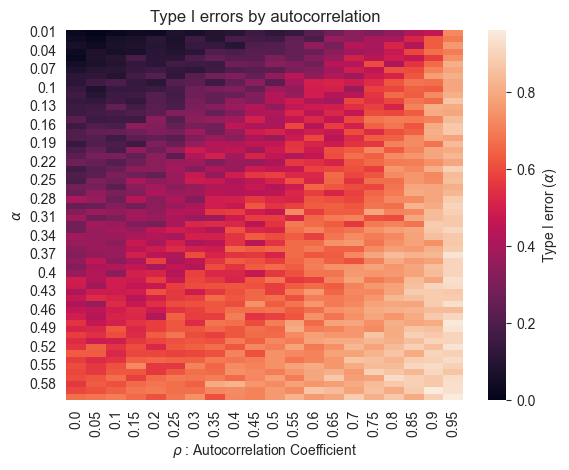

In [81]:
sns.heatmap(alpha_frame, cbar_kws = {r'label' : 'Type I error ($\\alpha$)'})
plt.xlabel(r'$\rho$ : Autocorrelation Coefficient')
plt.ylabel(r'$\alpha$')
plt.title('Type I errors by autocorrelation')
plt.show()

자기상관성이 존재하지 않는 경우 Type I error는 0에 가깝지만, 자기상관성이 커지면 커질수록 Type I error의 가능성이 올라가는 것을 볼 수 있다.

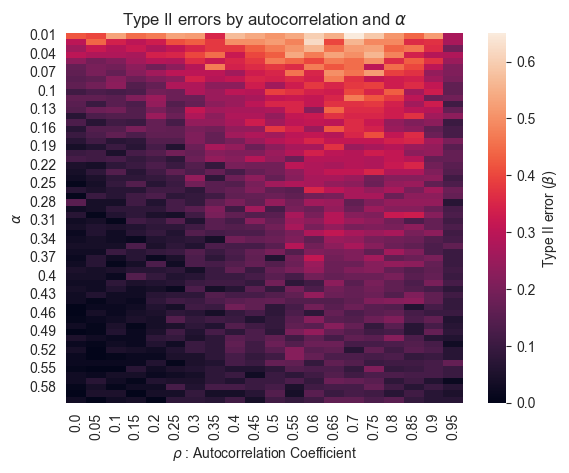

In [82]:
sns.heatmap(beta_frame, cbar_kws = {'label' : r'Type II error ($\beta$)'})
plt.xlabel(r'$\rho$ : Autocorrelation Coefficient')
plt.ylabel(r'$\alpha$')
plt.title(r'Type II errors by autocorrelation and $\alpha$')
plt.show()

대립가설을 가정하고 Type II error를 추정해 본 결과, 자기상관성 수준이 같을 때 Type I error가 낮을수록 Type II error가 증가하는 경향을 보인다. 즉, 금융과 경제학 데이터와 같이 자기상관성이 존재하는 데이터를 다룰 경우 type II error의 가능성을 항상 염두에 두고 있어야 한다.